In [72]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sqlite3 import connect

In [13]:
df = pd.read_csv("ScratchPad/Tweet_counted.csv")
df.head()

,Tweet,Alay Count,Abusive Count
0,disaat semua cowok berusaha melacak perhatian ...,5,1
1,siapa yang telat ngasih tau elu edan sarap gue...,3,2
2,41 kadang aku berfikir kenapa aku tetap percay...,3,0
3,aku itu aku ku tau matamu sipit tapi diliat da...,1,1
4,kaum cebong kapir udah keliatan dongoknya dari...,5,2


In [102]:
conn = connect("postprocessed_tweet.db")
df = pd.read_sql("SELECT * FROM tweet_post", conn)
df_clean = df[df['Tweet'] != '']
df_clean.shape

(12894, 13)

In [82]:
#menambah kolom word count
df["Word Count"] = df["Tweet"].astype('str').apply(lambda n: len(n.split()))

In [ ]:
sns.lmplot(x='Alay Count', y='Abusive Count', data=df, fit_reg=False)

In [ ]:
sns.displot(df['Alay Count'])

<Axes: xlabel='Alay Count', ylabel='count'>

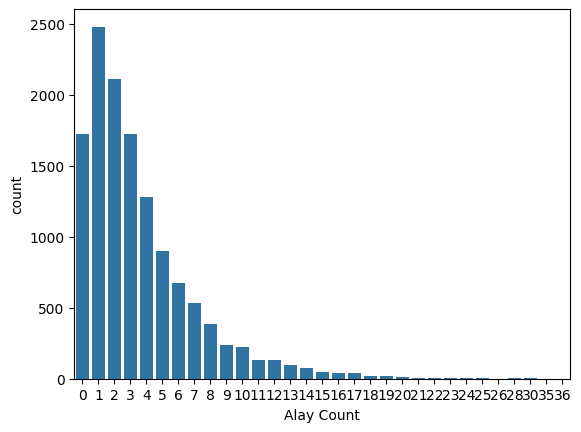

In [47]:
sns.countplot(x='Alay Count', data=df)

In [101]:
df_kamusalay = pd.read_csv("new_kamusalay.csv", encoding='latin-1', names=['Alay','Normal'])
alay_list = df_kamusalay['Alay'].to_list()
normal_list = df_kamusalay['Normal'].to_list()
df_kamusalay

,Alay,Normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit
